In [ ]:
"external/kallisto" index -i "output/kallisto/human.idx" "files/Homo_sapiens.GRCh38.cdna.all.fa"
"external/kallisto" quant -i "output/kallisto/human.idx" -o "output/kallisto/" --single -l 200 -s 20 "files/SRR3534129.fastq"

"external/kallisto" quant -i "output/kallisto/human.idx" -o "output/kallisto/" "files/SRR10345833_1.fastq" "files/SRR10345833_1.fastq"




In [2]:
import pandas as pd

c1 = pd.read_csv("../output/kallisto/abundance.tsv", sep="\t", header=None)
c1.index = c1.iloc[:,0]
c2 = pd.read_csv("../output/kallisto/abundance_1.tsv", sep="\t", header=None)
c2.index = c2.iloc[:,0]

/var/folders/r_/yj45vq792mz5r83pxxqhdz640000gn/T/ipykernel_27205/1235413552.py:3: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  c1 = pd.read_csv("../output/kallisto/abundance.tsv", sep="\t", header=None)
/var/folders/r_/yj45vq792mz5r83pxxqhdz640000gn/T/ipykernel_27205/1235413552.py:5: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  c2 = pd.read_csv("../output/kallisto/abundance_1.tsv", sep="\t", header=None)


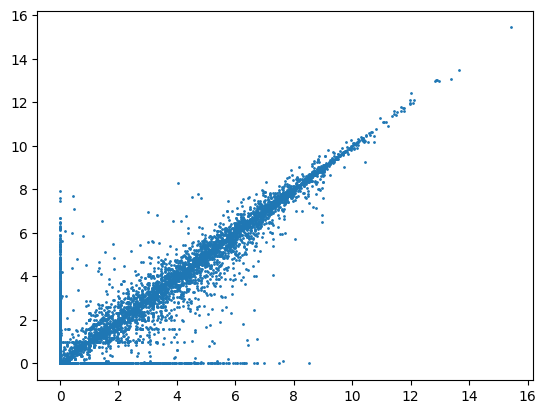

In [19]:
from matplotlib import pyplot as plt
import numpy as np

plt.scatter(np.log2(1+c1.iloc[1:,3].astype("float")), np.log2(1+c2.iloc[1:,3].astype("float")), s=1)

In [10]:
c2.iloc[1:,3].astype("float")

0
ENST00000631435.1     0.0000
ENST00000415118.1     0.0000
ENST00000448914.1     0.0000
ENST00000434970.2     0.0000
ENST00000632684.1     0.0000
                      ...   
ENST00000416718.2    18.0418
ENST00000445254.1     0.0000
ENST00000441281.1     0.0000
ENST00000614199.1     0.0000
ENST00000503096.1     0.0000
Name: 3, Length: 205541, dtype: float64

In [14]:
diff = np.log2(1+c1.iloc[1:,3].astype("float")) - np.log2(1+c2.iloc[1:,3].astype("float"))

In [16]:
len(np.where(np.abs(diff) > 2)[0])

618

In [20]:
np.corrcoef(np.log2(1+c1.iloc[1:,3].astype("float")), np.log2(1+c2.iloc[1:,3].astype("float")))

array([[1.        , 0.96566567],
       [0.96566567, 1.        ]])